## AUTOENCODERS
Los **autoencoders** son una clase especializada de algoritmos que pueden aprender representaciones eficientes de los datos de entrada sin necesidad de etiquetas.   
Se trata de una clase de redes neuronales artificiales diseñadas para el aprendizaje sin supervisión. Aprender a comprimir y representar eficazmente los datos de entrada sin etiquetas específicas es el principio esencial de un descodificador automático. Para ello se utiliza una estructura doble que consta de un codificador y un descodificador.   
El codificador transforma los datos de entrada en una representación de dimensiones reducidas, que suele denominarse "espacio latente" o "codificación".   
A partir de esa representación, un descodificador reconstruye la entrada inicial. Para que la red obtenga patrones significativos en los datos, un proceso de codificación y descodificación facilita la definición de características esenciales.

### Arquitectura de un autoencoder en el aprendizaje profundo
La arquitectura general de un autoencoder incluye un codificador, un decodificador y una capa de cuello de botella.  


<img src="./img/Autoencoder.png">


1. Codificador
- La capa de entrada toma los datos brutos de entrada
- Las capas ocultas reducen progresivamente la dimensionalidad de la entrada, capturando características y patrones importantes. Estas capas componen el codificador.
- La capa cuello de botella (espacio latente) es la última capa oculta, donde la dimensionalidad se reduce significativamente. Esta capa representa la codificación comprimida de los datos de entrada.
2. Decodificador
- La capa cuello de botella toma la representación codificada y la expande de nuevo a la dimensionalidad de la entrada original.
- Las capas ocultas aumentan progresivamente la dimensionalidad y tratan de reconstruir la entrada original.
- La capa de salida produce la salida reconstruida, que idealmente debería ser lo más parecida posible a los datos de entrada.
3. La función de pérdida utilizada durante el entrenamiento suele ser una pérdida de reconstrucción, que mide la diferencia entre la entrada y la salida reconstruida. Las opciones más habituales son el error cuadrático medio (ECM) para datos continuos o la entropía cruzada binaria para datos binarios.
4. Durante el entrenamiento, el autocodificador aprende a minimizar la pérdida de reconstrucción, forzando a la red a capturar las características más importantes de los datos de entrada en la capa cuello de botella.

## Implementación de un autoencoder
A continuación de construye un autoencoder compuesto por dos capas densas:   
 - un codificador encargado de condensar las imágenes en un vector latente de 64 dimensiones, y   
  - un decodificador encargado de reconstruir la imagen inicial a partir de este espacio latente.

### Importamos las librerías necesarias

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model


### Cargamos el dataset MNIST

In [16]:
# Carga del dataset y extracción de los conjuntos de train y test
(x_train, _), (x_test, _) = mnist.load_data()

# Normalización de los valores de los pixeles dentro del rango [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Tamaño de los conjuntos
print("Tamaño de los datos de entrenamiento:", x_train.shape)
print("Tamaño de los datos de test:", x_test.shape)


Tamaño de los datos de entrenamiento: (60000, 28, 28)
Tamaño de los datos de test: (10000, 28, 28)


### Definición de un Autoencoder básico  

En el siguiente fragmento de código se define la clase **SimpleAutoencoder**.  

- El constructor inicializa el autoencoder con las dimensiones latentes y la forma de los datos especificados.
- Las arquitecturas del codificador y decodificador se definen utilizando el modelo secuencial.  
- El método de llamada define el paso hacia adelante del autoencoder, donde los datos de entrada pasan a través del codificador para obtener los datos codificados y luego a través del decodificador para obtener los datos decodificados.

In [17]:
# Definción del modelo de autoencoder. Construimos una subclase de la clase Model de TF

class SimpleAutoencoder(Model):
	def __init__(self,latent_dimensions , data_shape):
		super(SimpleAutoencoder, self).__init__()
		self.latent_dimensions = latent_dimensions
		self.data_shape = data_shape

		# La arquitecturda del codificador usa un modelo Secuencial (Sequential)
		self.encoder = tf.keras.Sequential([
			layers.Flatten(),
			layers.Dense(latent_dimensions, activation='relu'),
		])

		# La arquitecturda del decodificador también usa un modelo Secuencial (Sequential)
		self.decoder = tf.keras.Sequential([
			layers.Dense(tf.math.reduce_prod(data_shape), activation='sigmoid'),
			layers.Reshape(data_shape)
		])

	
	# El método de propagación que define los pasos de codificación y decodificación
	def call(self, input_data):
		encoded_data = self.encoder(input_data)
		decoded_data = self.decoder(encoded_data)
		return decoded_data


# Extracción de información de la imagen del conjunto de test
input_data_shape = x_test.shape[1:]

# Especificación de la dimensionalidad del espacio latente
latent_dimensions = 64

# Creating an instance of the SimpleAutoencoder model
# Creación de una instancia de la clase del modelo definido (SimpleAutoencoder)
simple_autoencoder = SimpleAutoencoder(latent_dimensions, input_data_shape)


### Compilación y entrenamiento del autoencoder

In [12]:
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

simple_autoencoder.fit(x_train, x_train,
				epochs=1,
				shuffle=True,
				validation_data=(x_test, x_test))


1875/1875 [==============================] - 5s 2ms/step - loss: 0.0239 - val_loss: 0.0092


### Visualización de imágenes originales frente a imágenes reconstruidas

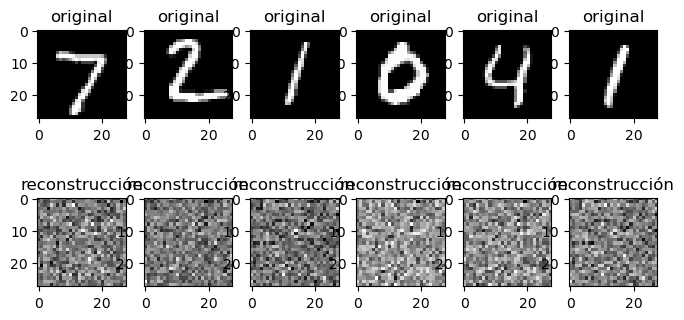

In [18]:
encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(8, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    
    # display reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstrucción")
    plt.gray()

plt.show()
